In [ ]:
import numpy as np  # Importing numpy library for numerical operations
import pandas as pd  # Importing pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import tensorflow as tf  # Importing TensorFlow library for deep learning tasks
from PIL import Image  # Importing Python Imaging Library for image processing
import os  # Importing os module for interacting with the operating system
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into train and test sets
from keras.utils import to_categorical  # Importing to_categorical for one-hot encoding of labels
from keras.models import Sequential  # Importing Sequential model for stacking layers sequentially
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D  # Importing layers for building CNN models
import warnings  # Importing warnings module to suppress any warnings
warnings.filterwarnings('ignore')  # Suppressing warnings to improve readability of the output

In [ ]:
def load_images_and_labels(classes, cur_path, target_size=(32, 32)):
    """
    Load images and corresponding labels from the specified directory.

    Parameters:
        classes (int): Number of classes (folders) in the directory.
        cur_path (str): Path to the directory containing class folders.
        target_size (tuple): Size to which images will be resized. Default is (32, 32).

    Returns:
        data (numpy.ndarray): Array containing resized images.
        labels (numpy.ndarray): Array containing corresponding labels.

    """
    data = []  # List to store resized images
    labels = []  # List to store corresponding labels

    # Loop through each class folder
    for i in range(classes):
        path = os.path.join(cur_path, 'Train', str(i))

        try:
            images = os.listdir(path)
            # Loop through each image in the class folder
            for a in images:
                try:
                    # Load and resize the image
                    image = Image.open(os.path.join(path, a))
                    resized_image = image.resize(target_size)
                    # Append resized image to data and its corresponding label to labels
                    data.append(np.array(resized_image))
                    labels.append(i)
                except (OSError, IOError) as e:
                    print(f"Error loading image: {a} ({e})")
        except FileNotFoundError:
            print(f"Class directory not found: {path}")

    # Convert data and labels lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Example usage:
classes = 43
cur_path = "i:\\class\\Term3\\BDM3035\\Project\\"
Glodata, Glolabels = load_images_and_labels(classes, cur_path)

In [ ]:
# Make copies of Glodata and Glolabels
cus_data = np.copy(Glodata)  # Copy the array of resized images
cus_label = np.copy(Glolabels)  # Copy the array of corresponding labels

Data shape: (21500, 32, 32, 3)
Labels shape: (21500,)


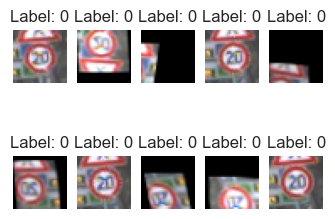

In [ ]:
#1...validation of resizing of images

# Check sizes of data and labels
print("Data shape:", cus_data.shape)  # Print the shape of the data array
print("Labels shape:", cus_label.shape)  # Print the shape of the labels array

# Visualize a few images along with their labels
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Create a 2x5 grid of subplots for visualization
fig, axes = plt.subplots(2, 5, figsize=(4, 3))

# Iterate through the first 10 images in the data array
for i, ax in enumerate(axes.flat):
    ax.imshow(cus_data[i])  # Display the image
    ax.set_title(f"Label: {cus_label[i]}")  # Set title as the corresponding label
    ax.axis('off')  # Turn off axis labels

plt.show()  # Display the plot

In [ ]:
#train test split of images

from keras.utils import to_categorical  # Import to_categorical for one-hot encoding
print("\n", cus_data.shape, cus_label.shape)  # Print the shapes of data and labels arrays

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cus_data, cus_label, test_size=0.2, random_state=42)
print("\n", X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Print the shapes of train and test sets

# Print the training and testing labels before one-hot encoding
print("\n", y_train, " ", y_test)

# Perform one-hot encoding on the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Print the one-hot encoded training and testing labels
print("\n", y_train, " ", y_test)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Custom CNN Model**

In [ ]:
from keras.layers import BatchNormalization  # Import BatchNormalization layer

# Create a Sequential model
TSRModel_custom = Sequential()

# Add layers to the model
TSRModel_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
TSRModel_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
TSRModel_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRModel_custom.add(Dropout(rate=0.25))
TSRModel_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
TSRModel_custom.add(MaxPool2D(pool_size=(2, 2)))
TSRModel_custom.add(Dropout(rate=0.25))
TSRModel_custom.add(Flatten())
TSRModel_custom.add(Dense(256, activation='relu'))
TSRModel_custom.add(Dropout(rate=0.5))
TSRModel_custom.add(Dense(43, activation='softmax'))

# Compilation of the model
TSRModel_custom.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
TSRModel_custom.summary()  # Print summary of the model architecture

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
# Number of epochs for training
custom_epochs = 25  # Define the number of epochs

# Train the model
custom_history = TSRModel_custom.fit(X_train, y_train, batch_size=96, epochs=custom_epochs, validation_data=(X_test, y_test))

Epoch 1/25
180/180 [==============================] - 24s 117ms/step - loss: 4.3191 - accuracy: 0.0318 - val_loss: 3.5785 - val_accuracy: 0.0930
Epoch 2/25
180/180 [==============================] - 20s 111ms/step - loss: 2.8471 - accuracy: 0.2429 - val_loss: 1.7765 - val_accuracy: 0.5986
Epoch 3/25
180/180 [==============================] - 20s 112ms/step - loss: 1.7845 - accuracy: 0.5159 - val_loss: 1.1307 - val_accuracy: 0.7437
Epoch 4/25
180/180 [==============================] - 20s 113ms/step - loss: 1.3604 - accuracy: 0.6201 - val_loss: 0.8413 - val_accuracy: 0.7912
Epoch 5/25
180/180 [==============================] - 20s 112ms/step - loss: 1.1215 - accuracy: 0.6791 - val_loss: 0.7136 - val_accuracy: 0.7993
Epoch 6/25
180/180 [==============================] - 21s 114ms/step - loss: 1.0065 - accuracy: 0.7056 - val_loss: 0.6499 - val_accuracy: 0.8198
Epoch 7/25
180/180 [==============================] - 21s 114ms/step - loss: 0.9042 - accuracy: 0.7313 - val_loss: 0.5976 - val_ac

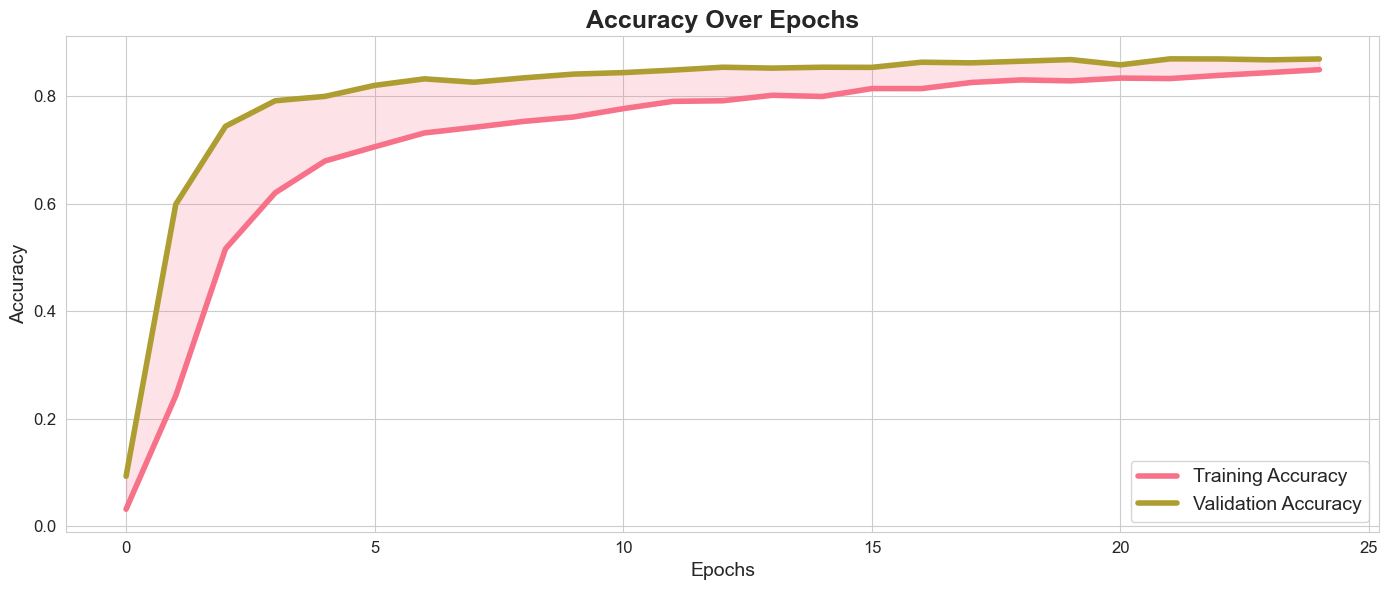

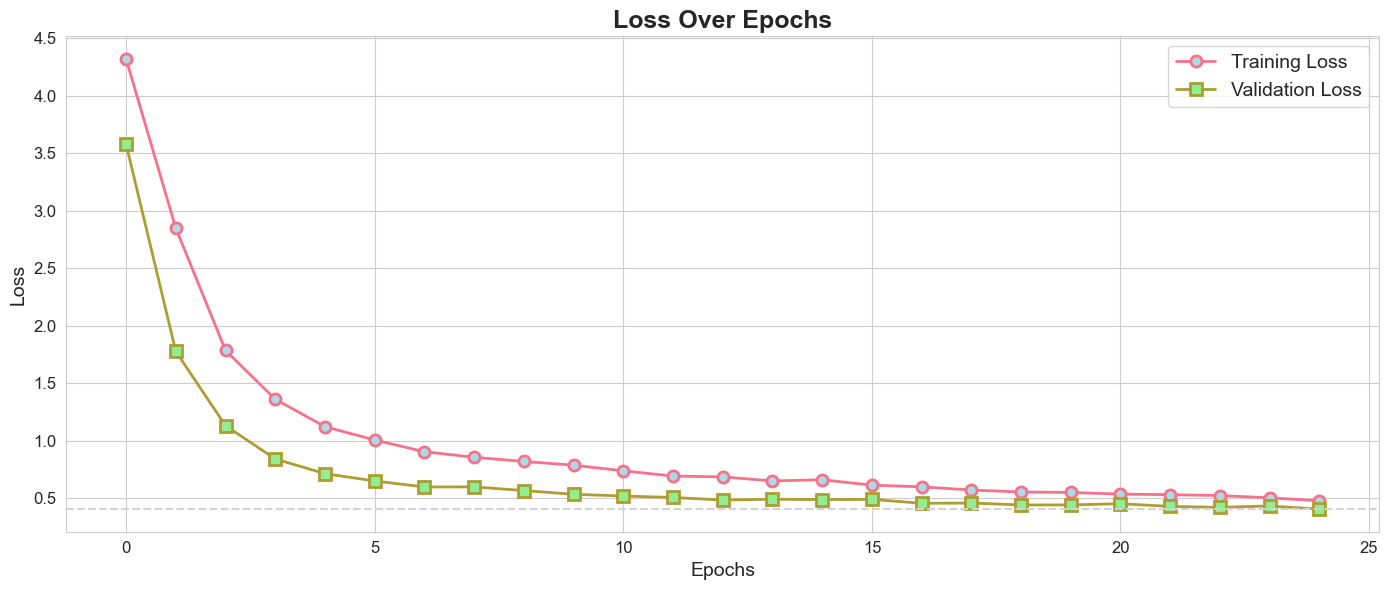

In [ ]:
import seaborn as sns  # Import seaborn for visualization enhancements
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Set a visually appealing style
sns.set_style('whitegrid')  # Set the plot style to have a clean background with gridlines

# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select the first two colors from a rich palette

# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Set a larger figure size
plt.plot(custom_history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)  # Plot training accuracy with a thick line
plt.plot(custom_history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)  # Plot validation accuracy with a thick line
plt.fill_between(range(len(custom_history.history['accuracy'])), custom_history.history['accuracy'], custom_history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shade the confidence region between training and validation accuracy curves
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')  # Set the title of the plot
plt.xlabel('Epochs', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Accuracy', fontsize=14)  # Set the label for the y-axis
plt.legend(fontsize=14)  # Add a legend to the plot
plt.xticks(fontsize=12)  # Set the font size for x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for y-axis ticks
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))  # Set a larger figure size
plt.plot(custom_history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)  # Plot training loss with markers
plt.plot(custom_history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)  # Plot validation loss with markers
plt.axhline(y=min(custom_history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Add a horizontal line to highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')  # Set the title of the plot
plt.xlabel('Epochs', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Loss', fontsize=14)  # Set the label for the y-axis
plt.legend(fontsize=14)  # Add a legend to the plot
plt.xticks(fontsize=12)  # Set the font size for x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for y-axis ticks
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements

plt.show()  # Display the plots

**Testing the custom TSRmodel**

In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score for calculating accuracy
import pandas as pd  # Import pandas for data manipulation
from PIL import Image  # Import Image from Python Imaging Library for image processing
import numpy as np  # Import numpy for numerical operations

# Read test labels and paths from CSV file
y_test = pd.read_csv('Test.csv')
labels_1 = y_test["ClassId"].values  # Extract class labels from the CSV file
imgs = y_test["Path"].values  # Extract image paths from the CSV file

data = []  # List to store resized images
for img in imgs:
    image = Image.open(img)  # Open the image
    image = image.resize((32, 32))  # Resize the image to 32x32
    data.append(np.array(image))  # Convert the image to a numpy array and append to the list
X_test = np.array(data)  # Convert the list of images to a numpy array

# Make predictions using the trained model
custom_pred_probabilities = TSRModel_custom.predict(X_test)  # Get class probabilities for each image
custom_pred = np.argmax(custom_pred_probabilities, axis=1)  # Get the predicted class labels from the probabilities

# Calculate accuracy
TSRModelACC = accuracy_score(labels_1, custom_pred)  # Calculate accuracy by comparing true labels with predicted labels
print(TSRModelACC)  # Print the accuracy

# Save the trained model
TSRModel_custom.save('TSRSystem.h5')  # Save the trained model to a file named 'TSRSystem.h5'

395/395 [==============================] - 6s 14ms/step
0.8125098970704672


**ResNet CNN Model**

In [ ]:
# Make copies of Glodata and Glolabels
rn_data = np.copy(Glodata)  # Copy the array of resized images
rn_label = np.copy(Glolabels)  # Copy the array of corresponding labels

In [ ]:
#train test split of images

from keras.utils import to_categorical  # Import to_categorical for one-hot encoding
print("\n", rn_data.shape, rn_label.shape)  # Print the shapes of data and labels arrays

# Split the data into training and testing sets
X_train_rn, X_test_rn, y_train_rn, y_test_rn = train_test_split(rn_data, rn_label, test_size=0.2, random_state=42)
print("\n", X_train_rn.shape, X_test_rn.shape, y_train_rn.shape, y_test_rn.shape)  # Print the shapes of train and test sets

# Print the training and testing labels before one-hot encoding
print("\n", y_train_rn, " ", y_test_rn)

# Perform one-hot encoding on the labels
y_train_rn = to_categorical(y_train_rn, 43)
y_test_rn = to_categorical(y_test_rn, 43)

# Print the one-hot encoded training and testing labels
print("\n", y_train_rn, " ", y_test_rn)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model from TensorFlow

# Define the ResNet50 model with ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

RNModel = Sequential()  # Create a Sequential model

# Add layers to the model
RNModel.add(base_model)  # Add the ResNet50 base model
RNModel.add(Flatten())  # Flatten the output of the base model
RNModel.add(Dense(120, activation='relu'))  # Add a fully connected layer with 120 neurons and ReLU activation
RNModel.add(Dense(84, activation='relu'))  # Add a fully connected layer with 84 neurons and ReLU activation
RNModel.add(Dense(43, activation='softmax'))  # Add a fully connected layer with 43 neurons (assuming 43 classes) and softmax activation for classification

# Compile the model
RNModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
RNModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 120)               245880    
                                                                 
 dense_3 (Dense)             (None, 84)                10164     
                                                                 
 dense_4 (Dense)             (None, 43)                3655      
                                                                 
Total params: 23847411 (90.97 MB)
Trainable params: 23794291 (90.77 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [ ]:
# Number of epochs for training
RNepochs = 25  # Define the number of epochs for training

# Train the ResNet50 model
RNhistory = RNModel.fit(X_train_rn, y_train_rn, batch_size=96, epochs=RNepochs, validation_data=(X_test_rn, y_test_rn))

Epoch 1/25
180/180 [==============================] - 317s 1s/step - loss: 1.3683 - accuracy: 0.6256 - val_loss: 3.4857 - val_accuracy: 0.4449
Epoch 2/25
  4/180 [..............................] - ETA: 4:05 - loss: 0.7973 - accuracy: 0.7969

KeyboardInterrupt: 

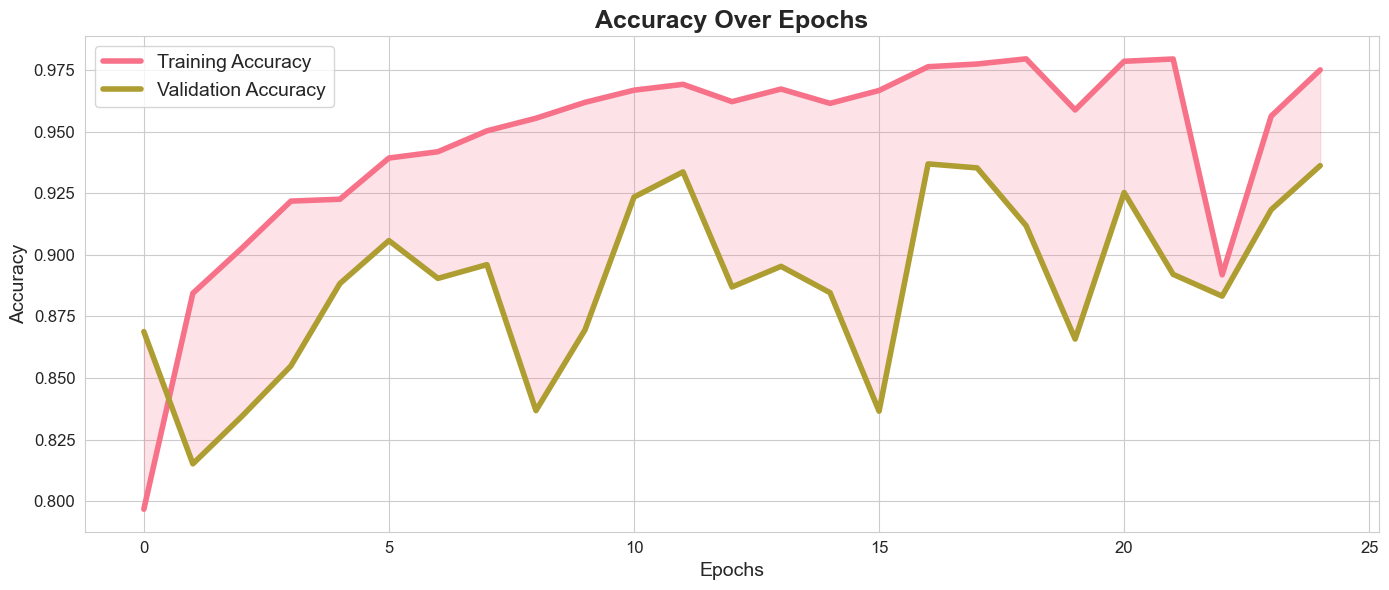

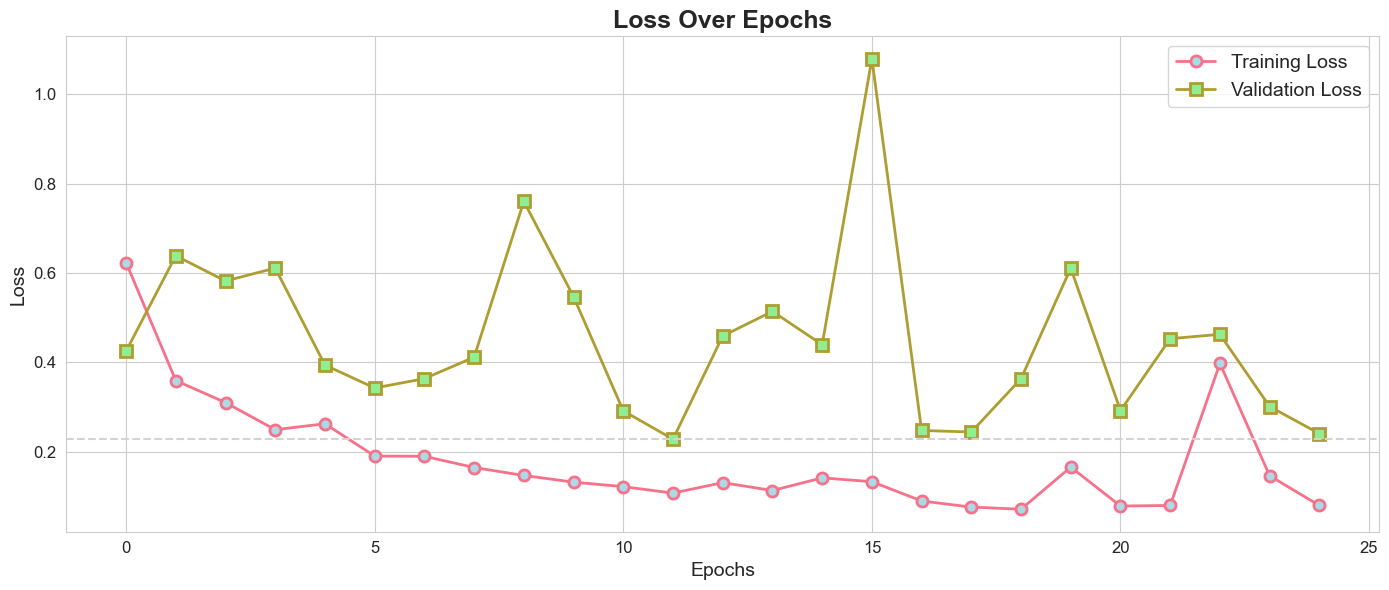

In [ ]:
import seaborn as sns  # Import seaborn for visualization enhancements
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Set a visually appealing style
sns.set_style('whitegrid')  # Set the plot style to have a clean background with gridlines

# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select the first two colors from a rich palette

# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Set a larger figure size
plt.plot(RNhistory.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)  # Plot training accuracy with a thick line
plt.plot(RNhistory.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)  # Plot validation accuracy with a thick line
plt.fill_between(range(len(RNhistory.history['accuracy'])), RNhistory.history['accuracy'], RNhistory.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shade the confidence region between training and validation accuracy curves
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')  # Set the title of the plot
plt.xlabel('Epochs', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Accuracy', fontsize=14)  # Set the label for the y-axis
plt.legend(fontsize=14)  # Add a legend to the plot
plt.xticks(fontsize=12)  # Set the font size for x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for y-axis ticks
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))  # Set a larger figure size
plt.plot(RNhistory.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)  # Plot training loss with markers
plt.plot(RNhistory.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)  # Plot validation loss with markers
plt.axhline(y=min(RNhistory.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Add a horizontal line to highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')  # Set the title of the plot
plt.xlabel('Epochs', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Loss', fontsize=14)  # Set the label for the y-axis
plt.legend(fontsize=14)  # Add a legend to the plot
plt.xticks(fontsize=12)  # Set the font size for x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for y-axis ticks
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements

plt.show()  # Display the plots

Testing Resnet CNN Model

In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score for calculating accuracy
import pandas as pd  # Import pandas for data manipulation
from PIL import Image  # Import Image from Python Imaging Library for image processing
import numpy as np  # Import numpy for numerical operations

# Read test labels and paths from CSV file
y_test_rn = pd.read_csv('Test.csv')
labels = y_test_rn["ClassId"].values  # Extract class labels from the CSV file
imgs = y_test_rn["Path"].values  # Extract image paths from the CSV file

data = []  # List to store resized images
for img in imgs:
    image = Image.open(img)  # Open the image
    image = image.resize((32, 32))  # Resize the image to 32x32
    data.append(np.array(image))  # Convert the image to a numpy array and append to the list
X_test_rn = np.array(data)  # Convert the list of images to a numpy array

# Make predictions using the trained ResNet50 model
rn_pred_probabilities = RNModel.predict(X_test_rn)  # Get class probabilities for each image
rn_pred = np.argmax(rn_pred_probabilities, axis=1)  # Get the predicted class labels from the probabilities

# Calculate accuracy
ResNetACC = accuracy_score(labels, rn_pred)  # Calculate accuracy by comparing true labels with predicted labels
print(ResNetACC)  # Print the accuracy

395/395 [==============================] - 68s 164ms/step
0.8146476642913697


**Comparison of our Custom CNN Model: TSRModel and ResNet50 CNN Model**

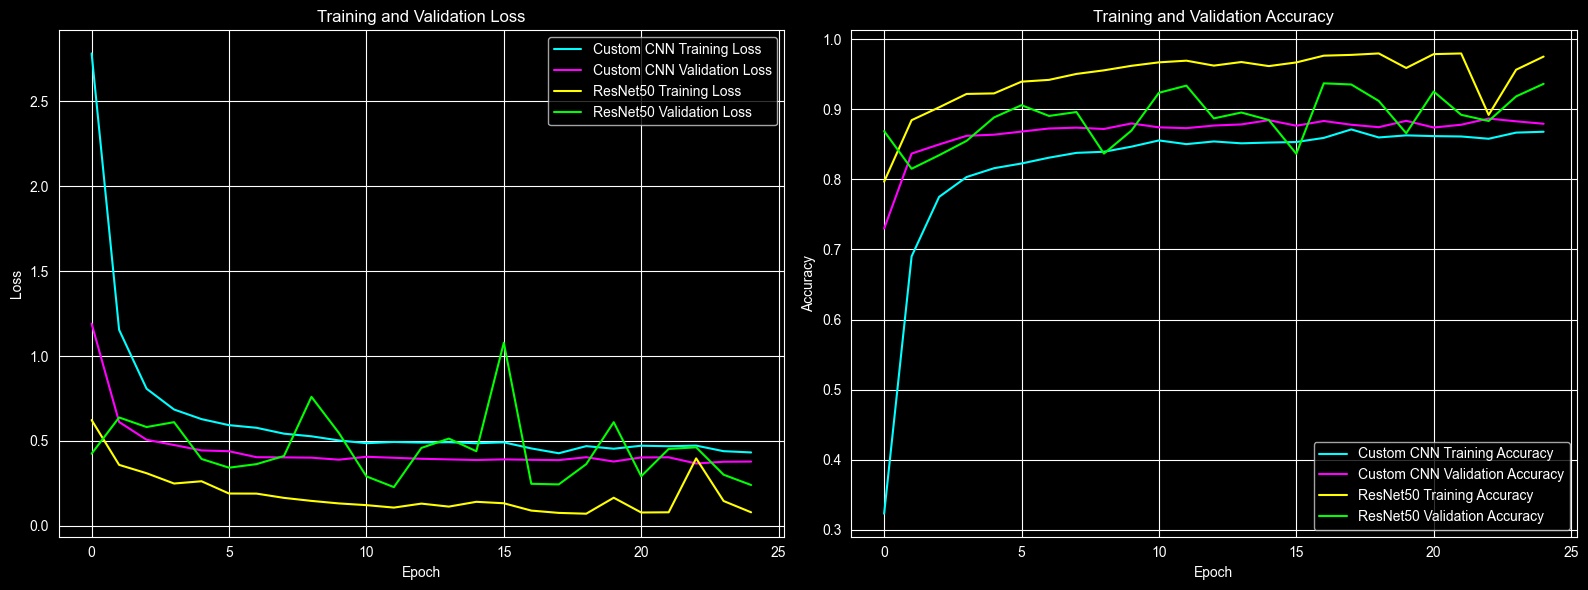

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for visualization enhancements

# Set the style
plt.style.use('dark_background')  # Set the plot style to dark background

# Plot loss and accuracy side by side
plt.figure(figsize=(16, 6))  # Set the figure size

# Plot loss
plt.subplot(1, 2, 1)  # Create subplot for loss
plt.plot(custom_history.history['loss'], label='Custom CNN Training Loss', color='cyan')  # Plot custom CNN training loss
plt.plot(custom_history.history['val_loss'], label='Custom CNN Validation Loss', color='magenta')  # Plot custom CNN validation loss
plt.plot(RNhistory.history['loss'], label='ResNet50 Training Loss', color='yellow')  # Plot ResNet50 training loss
plt.plot(RNhistory.history['val_loss'], label='ResNet50 Validation Loss', color='lime')  # Plot ResNet50 validation loss
plt.title('Training and Validation Loss')  # Set the title of the subplot
plt.xlabel('Epoch')  # Set the label for the x-axis
plt.ylabel('Loss')  # Set the label for the y-axis
plt.legend()  # Add a legend to the plot

# Plot accuracy
plt.subplot(1, 2, 2)  # Create subplot for accuracy
plt.plot(custom_history.history['accuracy'], label='Custom CNN Training Accuracy', color='cyan')  # Plot custom CNN training accuracy
plt.plot(custom_history.history['val_accuracy'], label='Custom CNN Validation Accuracy', color='magenta')  # Plot custom CNN validation accuracy
plt.plot(RNhistory.history['accuracy'], label='ResNet50 Training Accuracy', color='yellow')  # Plot ResNet50 training accuracy
plt.plot(RNhistory.history['val_accuracy'], label='ResNet50 Validation Accuracy', color='lime')  # Plot ResNet50 validation accuracy
plt.title('Training and Validation Accuracy')  # Set the title of the subplot
plt.xlabel('Epoch')  # Set the label for the x-axis
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.legend()  # Add a legend to the plot

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()  # Display the plots

**Comparison of Test Data Accuracy of both Models**

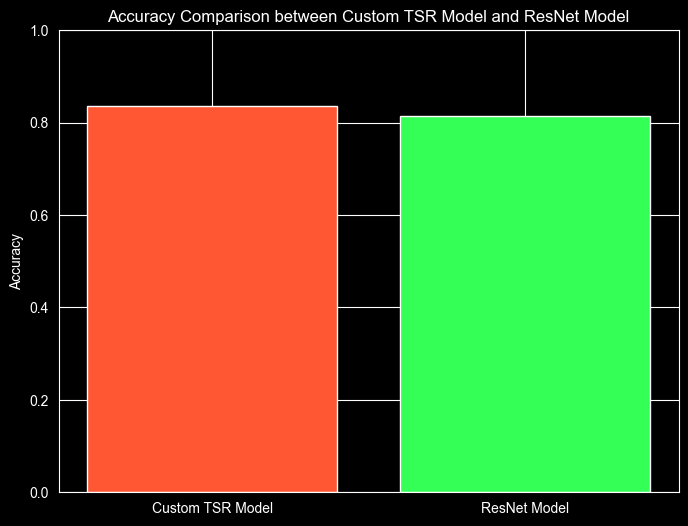

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Plotting the accuracy comparison
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(['Custom TSR Model', 'ResNet Model'], [TSRModelACC, ResNetACC], color=['#FF5733', '#33FF57'])  # Plot a bar chart with accuracy values for custom TSR model and ResNet model
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.ylabel('Accuracy')  # Set the label for the y-axis
plt.title('Accuracy Comparison between Custom TSR Model and ResNet Model')  # Set the title of the plot
plt.show()  # Display the plot

**Applying ResNet50 Transfer learning on our custom TSRModel**

In [ ]:
# Make copies of Glodata and Glolabels
tl_data = np.copy(Glodata)  # Copy the array of resized images
tl_label = np.copy(Glolabels)  # Copy the array of corresponding labels

In [ ]:
#train test split of images

from keras.utils import to_categorical  # Import to_categorical for one-hot encoding
print("\n", tl_data.shape, tl_label.shape)  # Print the shapes of data and labels arrays

# Split the data into training and testing sets
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(tl_data, tl_label, test_size=0.2, random_state=42)
print("\n", X_train_tl.shape, X_test_tl.shape, y_train_tl.shape, y_test_tl.shape)  # Print the shapes of train and test sets

# Print the training and testing labels before one-hot encoding
print("\n", y_train_tl, " ", y_test_tl)

# Perform one-hot encoding on the labels
y_train_tl = to_categorical(y_train_tl, 43)
y_test_tl = to_categorical(y_test_tl, 43)

# Print the one-hot encoded training and testing labels
print("\n", y_train_tl, " ", y_test_tl)


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.models import Model  # Import Model class from keras.models
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model from TensorFlow

# Load the ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Add your custom layers on top
x = base_model.output  # Get the output tensor from the base model
x = Flatten()(x)  # Flatten the output tensor
x = Dense(256, activation='relu')(x)  # Add a fully connected layer with 256 neurons and ReLU activation
x = Dropout(0.5)(x)  # Add dropout layer with a dropout rate of 0.5
predictions = Dense(43, activation='softmax')(x)  # Add a fully connected layer with 43 neurons (assuming 43 classes) and softmax activation for classification

# Create the final model
TSRModel_transfer = Model(inputs=base_model.input, outputs=predictions)  # Create a model with input as the input of the base model and output as the predictions

# Compile the model
TSRModel_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric

# Print model summary
TSRModel_transfer.summary()  # Print the summary of the model architecture

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
# Number of epochs for training
TSRTrans_epochs = 25  # Define the number of epochs for training the transfer learning model

# Train the transfer learning model
TSRTrans_history = TSRModel_transfer.fit(X_train_tl, y_train_tl, batch_size=96, epochs=TSRTrans_epochs, validation_data=(X_test_tl, y_test_tl))

Epoch 1/25
180/180 [==============================] - 87s 430ms/step - loss: 2.6923 - accuracy: 0.2926 - val_loss: 1.5505 - val_accuracy: 0.5223
Epoch 2/25
180/180 [==============================] - 67s 370ms/step - loss: 1.6391 - accuracy: 0.4895 - val_loss: 1.2073 - val_accuracy: 0.6202
Epoch 3/25
180/180 [==============================] - 63s 352ms/step - loss: 1.3332 - accuracy: 0.5749 - val_loss: 1.0281 - val_accuracy: 0.6686
Epoch 4/25
180/180 [==============================] - 64s 358ms/step - loss: 1.1327 - accuracy: 0.6311 - val_loss: 0.9175 - val_accuracy: 0.7049
Epoch 5/25
180/180 [==============================] - 65s 361ms/step - loss: 0.9934 - accuracy: 0.6688 - val_loss: 0.8795 - val_accuracy: 0.7160
Epoch 6/25
180/180 [==============================] - 65s 362ms/step - loss: 0.8892 - accuracy: 0.7003 - val_loss: 0.7858 - val_accuracy: 0.7526
Epoch 7/25
180/180 [==============================] - 65s 361ms/step - loss: 0.8326 - accuracy: 0.7243 - val_loss: 0.7697 - val_ac

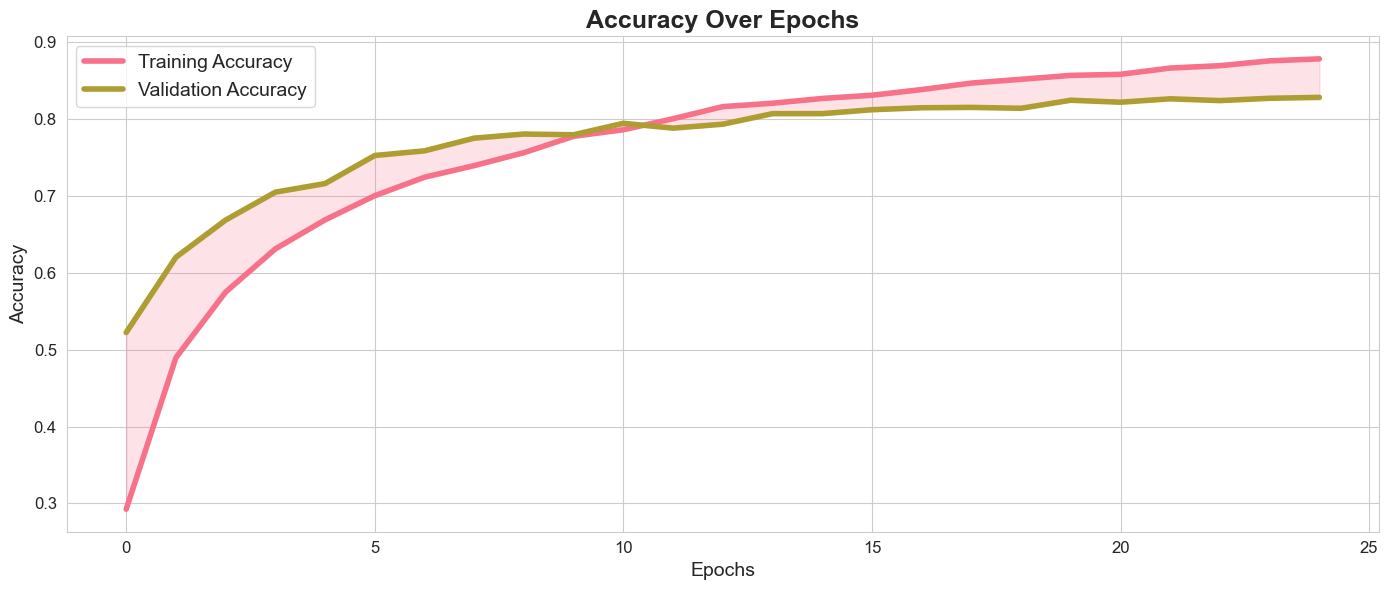

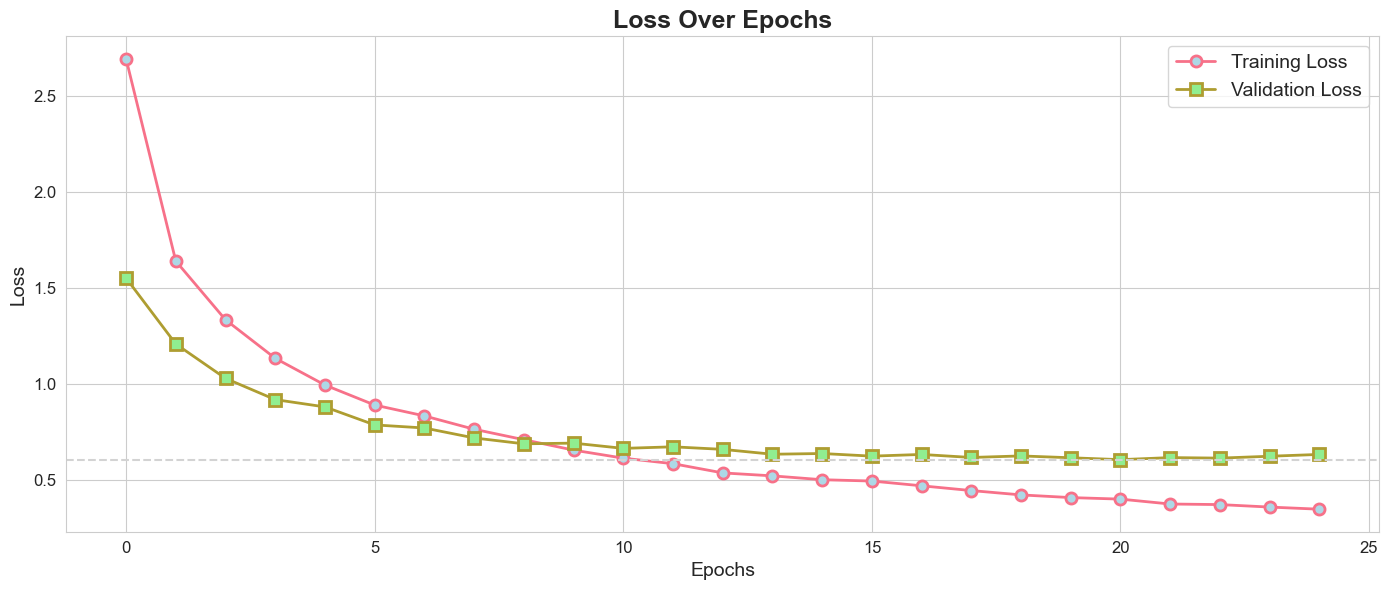

In [ ]:
import seaborn as sns  # Import seaborn for visualization enhancements
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Set a visually appealing style
sns.set_style('whitegrid')  # Set the plot style to have a clean background with gridlines

# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select the first two colors from a rich palette

# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Set a larger figure size
plt.plot(TSRTrans_history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)  # Plot training accuracy with a thick line
plt.plot(TSRTrans_history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)  # Plot validation accuracy with a thick line
plt.fill_between(range(len(TSRTrans_history.history['accuracy'])), TSRTrans_history.history['accuracy'], TSRTrans_history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shade the confidence region between training and validation accuracy curves
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')  # Set the title of the plot
plt.xlabel('Epochs', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Accuracy', fontsize=14)  # Set the label for the y-axis
plt.legend(fontsize=14)  # Add a legend to the plot
plt.xticks(fontsize=12)  # Set the font size for x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for y-axis ticks
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))  # Set a larger figure size
plt.plot(TSRTrans_history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)  # Plot training loss with markers
plt.plot(TSRTrans_history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)  # Plot validation loss with markers
plt.axhline(y=min(TSRTrans_history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Add a horizontal line to highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')  # Set the title of the plot
plt.xlabel('Epochs', fontsize=14)  # Set the label for the x-axis
plt.ylabel('Loss', fontsize=14)  # Set the label for the y-axis
plt.legend(fontsize=14)  # Add a legend to the plot
plt.xticks(fontsize=12)  # Set the font size for x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for y-axis ticks
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements

plt.show()  # Display the plots

**Testing the Transfer learnt TSRModel**

In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score for calculating accuracy
import pandas as pd  # Import pandas for data manipulation
from PIL import Image  # Import Image from Python Imaging Library for image processing
import numpy as np  # Import numpy for numerical operations

# Read test labels and paths from CSV file
y_test_tl = pd.read_csv('Test.csv')
labels = y_test_tl["ClassId"].values  # Extract class labels from the CSV file
imgs = y_test_tl["Path"].values  # Extract image paths from the CSV file

data = []  # List to store resized images
for img in imgs:
    image = Image.open(img)  # Open the image
    image = image.resize((32, 32))  # Resize the image to 32x32
    data.append(np.array(image))  # Convert the image to a numpy array and append to the list
X_test_tl = np.array(data)  # Convert the list of images to a numpy array

# Make predictions using the trained transfer learning model
tl_pred_probabilities = TSRModel_transfer.predict(X_test_tl)  # Get class probabilities for each image
tl_pred = np.argmax(tl_pred_probabilities, axis=1)  # Get the predicted class labels from the probabilities

# Calculate accuracy
TSRTransACC = accuracy_score(labels, tl_pred)  # Calculate accuracy by comparing true labels with predicted labels
print(TSRTransACC)  # Print the accuracy

395/395 [==============================] - 41s 104ms/step
0.39699129057798893


**Regularized TSR Model**

In [ ]:
# Make copies of Glodata and Glolabels
tsreg_data = np.copy(Glodata)  # Create a copy of the data array for traffic sign images
tsreg_label = np.copy(Glolabels)  # Create a copy of the label array for corresponding labels

In [ ]:
#train test split of images

from keras.utils import to_categorical  # Import to_categorical for one-hot encoding
print("\n", tsreg_data.shape, tsreg_label.shape)  # Print the shapes of data and labels arrays

# Split the data into training and testing sets
X_train_tsreg, X_test_tsreg, y_train_tsreg, y_test_tsreg = train_test_split(tsreg_data, tsreg_label, test_size=0.2, random_state=42)
print("\n", X_train_tsreg.shape, X_test_tsreg.shape, y_train_tsreg.shape, y_test_tsreg.shape)  # Print the shapes of train and test sets

# Print the training and testing labels before one-hot encoding
print("\n", y_train_tsreg, " ", y_test_tsreg)

# Perform one-hot encoding on the labels
y_train_tsreg = to_categorical


 (21500, 32, 32, 3) (21500,)

 (17200, 32, 32, 3) (4300, 32, 32, 3) (17200,) (4300,)

 [17 21 23 ... 10  1 31]   [40 13 33 ... 16 26 23]

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]   [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.regularizers import l2  # Import L2 regularization

# Create a Sequential model with L2 regularization
TSRReg_custom = Sequential()

# Add layers to the model with L2 regularization
TSRReg_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)))  # Add a convolutional layer with L2 regularization
TSRReg_custom.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', kernel_regularizer=l2(0.01)))  # Add a convolutional layer with L2 regularization
TSRReg_custom.add(MaxPool2D(pool_size=(2, 2)))  # Add max pooling layer
TSRReg_custom.add(Dropout(rate=0.25))  # Add dropout layer
TSRReg_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))  # Add a convolutional layer with L2 regularization
TSRReg_custom.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))  # Add a convolutional layer with L2 regularization
TSRReg_custom.add(MaxPool2D(pool_size=(2, 2)))  # Add max pooling layer
TSRReg_custom.add(Dropout(rate=0.25))  # Add dropout layer
TSRReg_custom.add(Flatten())  # Flatten the output
TSRReg_custom.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Add a fully connected layer with L2 regularization
TSRReg_custom.add(Dropout(rate=0.5))  # Add dropout layer
TSRReg_custom.add(Dense(43, activation='softmax', kernel_regularizer=l2(0.01)))  # Add a fully connected layer with L2 regularization

# Compilation of the model
TSRReg_custom.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model with categorical crossentropy loss and Adam optimizer
TSRReg_custom.summary()  # Print the summary of the model architecture

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
# Number of epochs for training
TSRReg_epochs = 25  # Define the number of epochs for training the regularized model

# Train the regularized model
TSRReg_history = TSRReg_custom.fit(X_train_tsreg, y_train_tsreg, batch_size=32, epochs=TSRReg_epochs, validation_data=(X_test_tsreg, y_test_tsreg))

Epoch 1/25
538/538 [==============================] - 35s 59ms/step - loss: 6.9960 - accuracy: 0.3008 - val_loss: 3.9107 - val_accuracy: 0.7674
Epoch 2/25
538/538 [==============================] - 31s 58ms/step - loss: 3.2651 - accuracy: 0.7123 - val_loss: 2.3100 - val_accuracy: 0.8388
Epoch 3/25
538/538 [==============================] - 31s 58ms/step - loss: 2.2480 - accuracy: 0.7789 - val_loss: 1.7537 - val_accuracy: 0.8530
Epoch 4/25
538/538 [==============================] - 32s 60ms/step - loss: 1.7943 - accuracy: 0.8085 - val_loss: 1.5001 - val_accuracy: 0.8498
Epoch 5/25
538/538 [==============================] - 32s 59ms/step - loss: 1.5987 - accuracy: 0.8159 - val_loss: 1.3579 - val_accuracy: 0.8600
Epoch 6/25
538/538 [==============================] - 32s 60ms/step - loss: 1.4950 - accuracy: 0.8229 - val_loss: 1.2967 - val_accuracy: 0.8640
Epoch 7/25
538/538 [==============================] - 32s 59ms/step - loss: 1.4326 - accuracy: 0.8276 - val_loss: 1.2895 - val_accuracy:

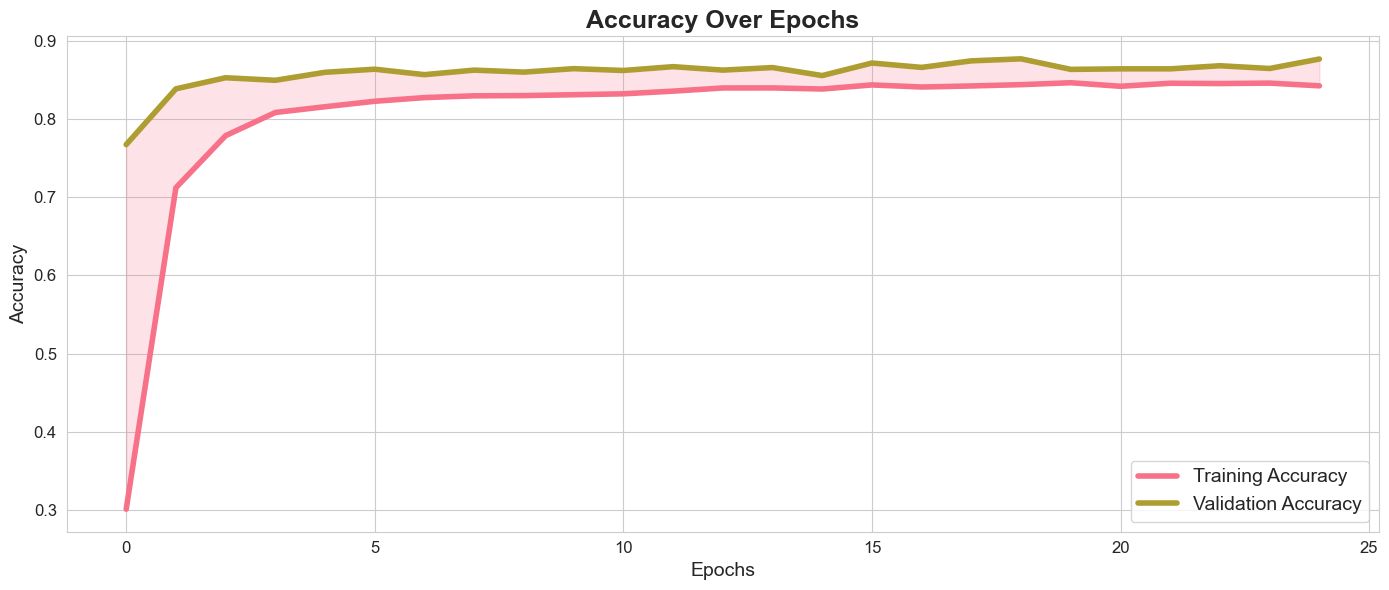

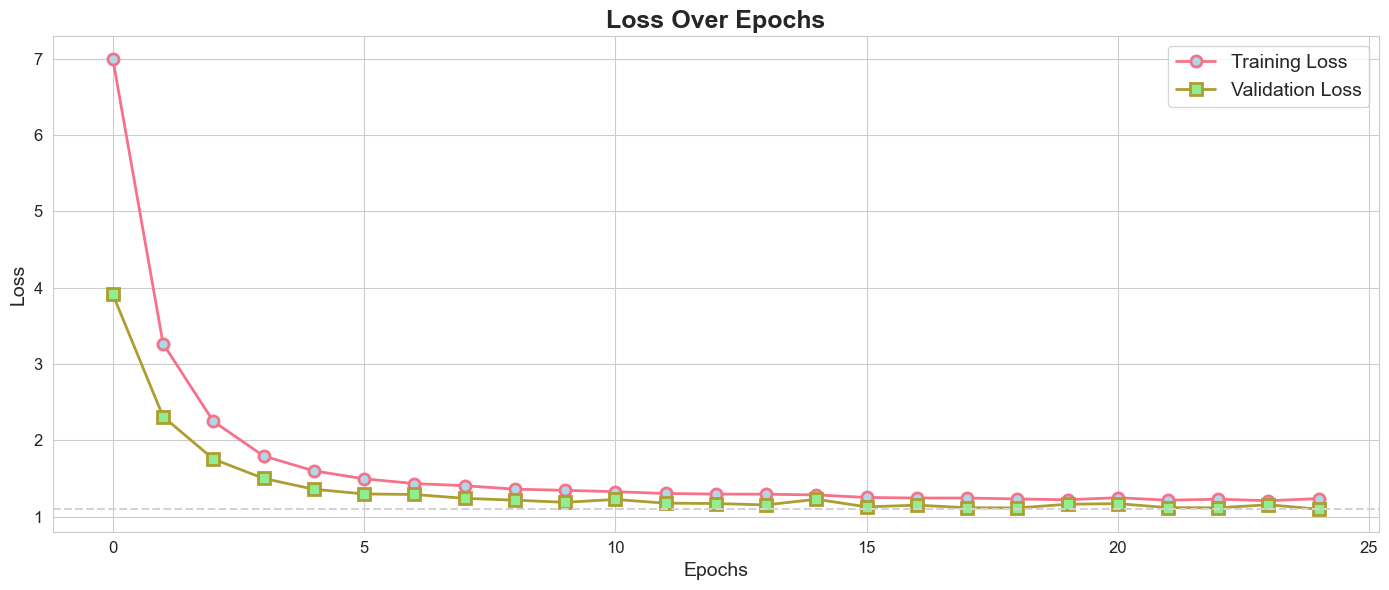

In [ ]:
import seaborn as sns  # Import seaborn for visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Set a visually appealing style
sns.set_style('whitegrid')  # Set the style to have a clean background with gridlines

# Employ a vibrant color palette
colors = sns.color_palette('husl', 5)[:2]  # Select the first two colors from a rich palette

# Plot accuracy with a smooth curve and shaded confidence region
plt.figure(figsize=(14, 6))  # Set the figure size
plt.plot(TSRReg_history.history['accuracy'], label='Training Accuracy', color=colors[0], linewidth=4)  # Plot training accuracy
plt.plot(TSRReg_history.history['val_accuracy'], label='Validation Accuracy', color=colors[1], linewidth=4)  # Plot validation accuracy
plt.fill_between(range(len(TSRReg_history.history['accuracy'])), TSRReg_history.history['accuracy'], TSRReg_history.history['val_accuracy'], alpha=0.2, color=colors[0])  # Shade the confidence region
plt.title('Accuracy Over Epochs', fontsize=18, fontweight='bold')  # Set title
plt.xlabel('Epochs', fontsize=14)  # Set x-label
plt.ylabel('Accuracy', fontsize=14)  # Set y-label
plt.legend(fontsize=14)  # Add legend
plt.xticks(fontsize=12)  # Set x-tick labels font size
plt.yticks(fontsize=12)  # Set y-tick labels font size
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Plot loss with a semi-transparent background and enhanced markers
plt.figure(figsize=(14, 6))  # Set the figure size
plt.plot(TSRReg_history.history['loss'], label='Training Loss', color=colors[0], linewidth=2, marker='o', markersize=8, markerfacecolor='lightblue', markeredgewidth=2)  # Plot training loss
plt.plot(TSRReg_history.history['val_loss'], label='Validation Loss', color=colors[1], linewidth=2, marker='s', markersize=8, markerfacecolor='lightgreen', markeredgewidth=2)  # Plot validation loss
plt.axhline(y=min(TSRReg_history.history['val_loss']), color='lightgray', linestyle='--', linewidth=1.5)  # Highlight minimum validation loss
plt.title('Loss Over Epochs', fontsize=18, fontweight='bold')  # Set title
plt.xlabel('Epochs', fontsize=14)  # Set x-label
plt.ylabel('Loss', fontsize=14)  # Set y-label
plt.legend(fontsize=14)  # Add legend
plt.xticks(fontsize=12)  # Set x-tick labels font size
plt.yticks(fontsize=12)  # Set y-tick labels font size
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

Testing the Regularized model

In [ ]:
from sklearn.metrics import accuracy_score  # Import accuracy_score from sklearn
import pandas as pd  # Import pandas for data manipulation
from PIL import Image  # Import Image module from PIL for image processing
import numpy as np  # Import numpy for numerical operations

# Read the test data from CSV file
y_test_tsreg = pd.read_csv('Test.csv')

# Extract labels and image paths from the test data
labels = y_test_tsreg["ClassId"].values
imgs = y_test_tsreg["Path"].values

# Process images
data = []
for img in imgs:
    image = Image.open(img)  # Open the image
    image = image.resize((32, 32))  # Resize the image to 32x32 pixels
    data.append(np.array(image))  # Convert the image to numpy array and append to data
X_test_tsreg = np.array(data)  # Convert data to numpy array

# Make predictions using the trained model (TSRModel_transfer)
tsreg_pred_probabilities = TSRModel_transfer.predict(X_test_tsreg)  # Get class probabilities for each image
tsreg_pred = np.argmax(tsreg_pred_probabilities, axis=1)  # Get predicted class labels from probabilities

# Calculate accuracy
TSRRegACC = accuracy_score(labels, tsreg_pred)  # Calculate accuracy using true labels and predicted labels
print(TSRRegACC)  # Print the accuracy

395/395 [==============================] - 66s 160ms/step
0.3955661124307205
